In [201]:
import pandas as pd
import numpy as np

In [ ]:
https://electionlab.mit.edu/data#data

In [83]:
df2 = pd.read_csv('1976-2016-house.csv')

In [86]:
df2['year'].unique()

array([1990, 2016, 2006, 1984, 1986, 2002, 1992, 1998, 1976, 1996, 2012,
       2010, 1980, 1982, 1978, 2008, 2000, 1988, 2004, 2014, 1994])

In [104]:
df2_year = df2.loc[df2['year']>=2016]

In [260]:
df2_year.shape

(1441, 16)

In [983]:
df2_year.loc[df2_year['state']=='Wyoming'];

In [318]:
df2_year.loc[df2_year['candidate']=='Ryan Greene', 'party'] ='democrat'
# df.loc[df['column_name'] == some_value]

/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [323]:
df2_year.loc[df2_year['candidate']=='Liz Cheney', 'party'] ='republican'

/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [338]:
df2_party_rep = df2_year.loc[df2_year['party']=='republican']

In [984]:
df2_party_rep.tail();

In [343]:
df2_party_dem = df2_year.loc[df2_year['party']=='democrat']

In [985]:
df2_party_dem.tail();

In [303]:
len(df2_party_dem)

421

In [376]:
len(df2_party_rep)

420

In [982]:
df2_concat = pd.concat([df2_party_dem, df2_party_rep])
df2_concat.sort_values(['state','district']);

In [346]:
df2_concat = df2_concat.drop(['state_fips', 'state_cen', 'state_ic', 'office', 'stage', 'special', 'candidate', 'writein', 'version', 'totalvotes', 'year'], axis=1)

In [934]:
df2_sort = df2_concat.sort_values(['state','district'])

In [986]:
df2_sort.head();

In [936]:
df2_sort['totalvotes'] = df2_sort.groupby(['state', 'district']).candidatevotes.transform('sum')
# df['Data4'] = df['Data3'].groupby(df['Date']).transform('sum')

In [937]:
df2_sort['candidatevotes_combined'] = df2_sort.groupby(['state','district','party']).candidatevotes.transform('sum')

In [938]:
df2_sort = df2_sort[['state','district','party','candidatevotes_combined','totalvotes']].drop_duplicates()

In [939]:
df2_sort['per_vote'] = np.round(np.where(df2_sort['candidatevotes_combined'] > 0, df2_sort['candidatevotes_combined']/df2_sort['totalvotes'], 0), 4)
df2_sort

,state,district,party,candidatevotes_combined,totalvotes,per_vote
358,Alabama,1,republican,208083,208083,1.0000
174,Alabama,2,democrat,112089,246975,0.4538
497,Alabama,2,republican,134886,246975,0.5462
463,Alabama,3,democrat,94549,286713,0.3298
425,Alabama,3,republican,192164,286713,0.6702
351,Alabama,4,republican,235925,235925,1.0000
352,Alabama,5,democrat,102234,307881,0.3321
278,Alabama,5,republican,205647,307881,0.6679
265,Alabama,6,democrat,83709,329022,0.2544
281,Alabama,6,republican,245313,329022,0.7456


In [377]:
len(df2_sort['totalvotes'].unique())

435

In [940]:
df2_sort['congdist'] = df2_sort['state'].map(str) + df2_sort['district'].astype(str)
# dataframe["period"] = dataframe["Year"].map(str) + dataframe["quarter"]

In [821]:
len(df2_sort)

808

In [987]:
df2_sort.head();

In [953]:
df2_final = df2_sort.drop(['candidatevotes_combined','totalvotes'], axis=1)

In [994]:
df2_final.head()

,state,district,party,per_vote,congdist
358,Alabama,1,republican,1.0000,Alabama1
174,Alabama,2,democrat,0.4538,Alabama2
497,Alabama,2,republican,0.5462,Alabama2
463,Alabama,3,democrat,0.3298,Alabama3
425,Alabama,3,republican,0.6702,Alabama3


In [1032]:
# dem_vote = df2_final['dem_vote'] = np.where(df2_final['party'] == 'democrat', df2_final['per_vote'], 0)

In [1033]:
# rep_vote = df2_final['rep_vote'] = np.where(df2_final['party'] == 'republican', df2_final['per_vote'], 0)

In [1065]:
df2_final['rep_vote']= np.where((df2_final['party'] == 'democrat') & (df2_final['rep_vote'] == 0) & df2_final['dem_vote'] != 0, 1 - df2_final['dem_vote'],rep_vote)

In [1066]:
df2_final['dem_vote']= np.where((df2_final['party'] == 'republican') & (df2_final['dem_vote'] == 0) & df2_final['rep_vote'] != 0, 1 - df2_final['rep_vote'],dem_vote)

In [1068]:
df2_final['dem_vote'] = df2_final['dem_vote'].round(4)

In [1070]:
df2_final['rep_vote'] = df2_final['rep_vote'].round(4)

In [1074]:
# df2_final.head()

In [1075]:
df2_final = df2_final[['state','district','congdist','dem_vote','rep_vote']].drop_duplicates().reset_index().drop(columns = 'index')
df2_final
# df2_sort = df2_sort[['state','district','party','candidatevotes_combined','totalvotes']].drop_duplicates()

,state,district,congdist,dem_vote,rep_vote
0,Alabama,1,Alabama1,0.0000,1.0000
1,Alabama,2,Alabama2,0.4538,0.5462
2,Alabama,3,Alabama3,0.3298,0.6702
3,Alabama,4,Alabama4,0.0000,1.0000
4,Alabama,5,Alabama5,0.3321,0.6679
5,Alabama,6,Alabama6,0.2544,0.7456
6,Alabama,7,Alabama7,1.0000,0.0000
7,Alaska,0,Alaska0,0.4172,0.5828
8,Arizona,1,Arizona1,0.5388,0.4612
9,Arizona,2,Arizona2,0.4304,0.5696


In [1076]:
# df2_test.iloc[4] == df2_test.iloc[5]

In [1057]:
print(df2_test.iloc[4].dem_vote)
print(df2_test.iloc[5].dem_vote)



0.3321
0.33209999999999995


## indepedenct vars

In [ ]:
https://factfinder.census.gov/faces/nav/jsf/pages/searchresults.xhtml?refresh=t

In [152]:
df3 = pd.read_csv('ACS_16_1YR_S0101_with_ann.csv')

In [989]:
df3.tail();

In [378]:
df3.shape

(438, 219)

In [625]:
drop_first = df3.drop(0)
# drop_first['GEO.display-label'].str.split(' ',0)[8][2]

In [626]:
d_f = drop_first['GEO.display-label'][:-1]

In [697]:
d_f[1]

'Congressional District 1 (115th Congress), Alabama'

In [565]:
type(d_f)

pandas.core.series.Series

In [679]:
d_f.str.split(' ',0)[2]

['Congressional', 'District', '2', '(115th', 'Congress),', 'Alabama']

In [421]:
name_dist_state+name_dist_num

' Alabama1'

In [746]:
list(drop_first['GEO.display-label'])[-1]

'Resident Commissioner District (at Large) (115th Congress), Puerto Rico'

In [990]:
def state_num():
    split_list = []
    for x in d_f:
        s = x.split(' ')[2]
        if s == '(at':
            s = '0'
        else:
            s         
        split_list.append(s)
        
    name_list = []
    for y in d_f:
        n = y.split(', ')[1]
        name_list.append(n)
        
    zip_list = list(zip(name_list, split_list))
        
    final_list = []
    for a,b in zip_list:
        final_list.append("".join((a,b)))
    
    return final_list
    
state_num();


In [743]:
len(state_num())

436

In [991]:
total_pop = df3['HC01_EST_VC01'][1:-1].astype(int)
total_pop.head();

In [762]:
male_pop = df3['HC02_EST_VC01'][1:-1].astype(int)

In [763]:
female_pop = df3['HC03_EST_VC01'][1:-1].astype(int)

In [970]:
pop_list = list(zip(state_num(), total_pop, male_pop, female_pop, round(male_pop/total_pop,4), round(female_pop/total_pop,4)))

In [971]:
df_pop = pd.DataFrame(pop_list, columns=['congdist','totalpop','malepop','femalepop','malepopper','femalepopper'])

In [972]:
df_s_and_p = df_pop.drop(['totalpop', 'malepop', 'femalepop'], axis=1)

In [992]:
df_s_and_p.head();

In [1077]:
df_state_and_pop = pd.merge(df2_final, df_s_and_p, on=['congdist'], how='inner')
# pd.merge(bas_sort, bp_sort, on=[0], how='inner')

In [1080]:
df_state_and_pop.head()

,state,district,congdist,dem_vote,rep_vote,malepopper,femalepopper
0,Alabama,1,Alabama1,0.0000,1.0000,0.4809,0.5191
1,Alabama,2,Alabama2,0.4538,0.5462,0.4878,0.5122
2,Alabama,3,Alabama3,0.3298,0.6702,0.4861,0.5139
3,Alabama,4,Alabama4,0.0000,1.0000,0.4893,0.5107
4,Alabama,5,Alabama5,0.3321,0.6679,0.4926,0.5074


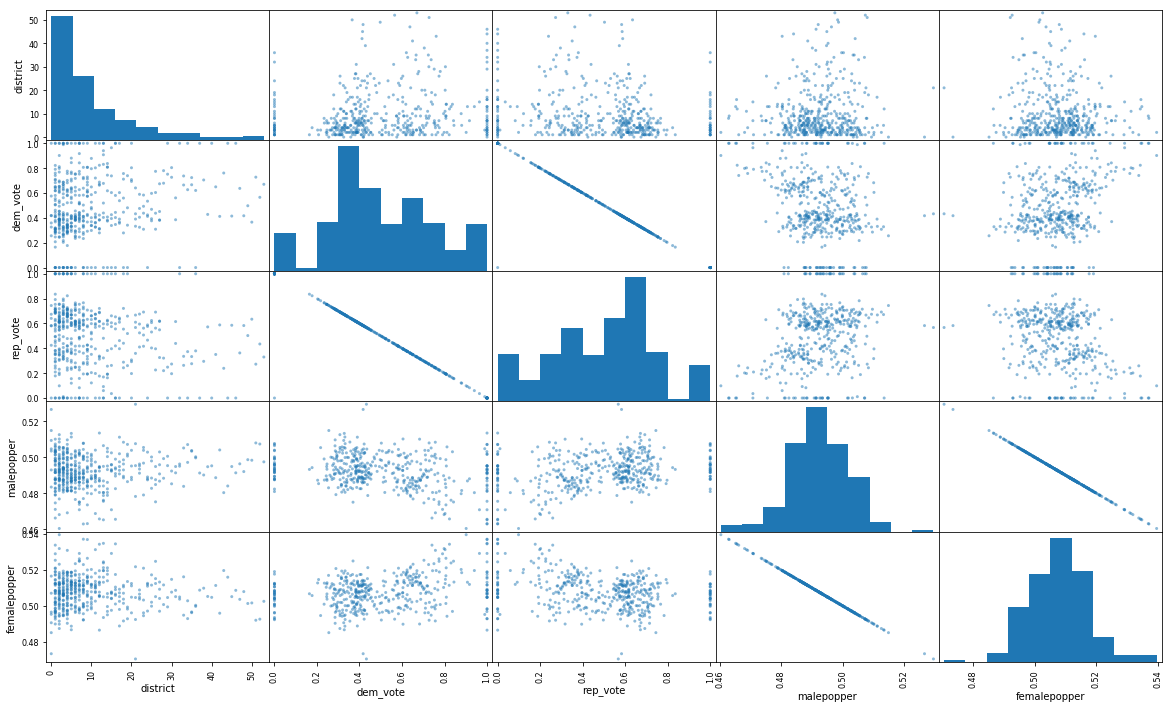

In [1081]:
pd.plotting.scatter_matrix(df_state_and_pop, figsize=[20,12]);

In [978]:
df3.unique()

AttributeError: 'DataFrame' object has no attribute 'unique'